## 用 LSTM 預測股票

### 安裝 pandas-datareader

In [1]:
! pip install pandas-datareader

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### 讀取股票資料

In [6]:
import pandas_datareader
dataset_train = pandas_datareader.get_data_yahoo('2891.TW')

Populating the interactive namespace from numpy and matplotlib


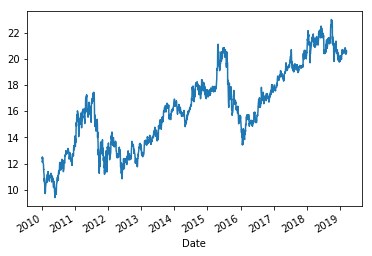

In [9]:
%pylab inline
dataset_train['Close'].plot(kind = 'line')

In [10]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2258 entries, 2010-01-04 to 2019-03-15
Data columns (total 6 columns):
High         2258 non-null float64
Low          2258 non-null float64
Open         2258 non-null float64
Close        2258 non-null float64
Volume       2258 non-null float64
Adj Close    2258 non-null float64
dtypes: float64(6)
memory usage: 123.5 KB


In [11]:
dataset_train.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2258.000000,2258.000000,2258.000000,2258.000000,2.258000e+03,2258.000000
mean,16.337582,16.083328,16.219394,16.212431,4.479740e+07,13.753408
std,3.134006,3.133552,3.133594,3.141839,2.782286e+07,3.968961
min,9.570480,9.205890,9.448950,9.418570,0.000000e+00,6.508332
25%,13.614450,13.402200,13.514900,13.487150,2.657971e+07,10.343856
50%,16.260500,16.024200,16.148100,16.148100,3.787212e+07,13.325441
75%,18.750000,18.587500,18.700001,18.667026,5.371670e+07,16.667042
max,23.000000,22.799999,22.900000,23.000000,3.655387e+08,23.000000


In [12]:
training_set = dataset_train.iloc[:, 3:4].values

In [13]:
training_set

array([[12.15299988],
       [12.15299988],
       [12.51760006],
       ...,
       [20.45000076],
       [20.54999924],
       [20.60000038]])

###  資料標準化

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [15]:
training_set_scaled

array([[0.20133596],
       [0.20133596],
       [0.22818145],
       ...,
       [0.81224369],
       [0.81960657],
       [0.82328816]])

In [16]:
len(training_set_scaled)

2258

In [20]:
2258 * 0.8

1806.4

In [21]:
import numpy as np
X_train = []
y_train = []
for i in range(60, 1800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [23]:
X_train.shape

(1740, 60)

In [24]:
y_train.shape

(1740,)

In [25]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1740, 60, 1)

###  建構神經網路模型 

In [26]:
# Importing the Keras libraries and packages
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

Using TensorFlow backend.


In [27]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [28]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/100
1740/1740 [==============================] - 11s 6ms/step - loss: 0.0340
Epoch 2/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0060
Epoch 3/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0042
Epoch 4/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0044
Epoch 5/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0038
Epoch 6/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0037
Epoch 7/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0036
Epoch 8/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0033
Epoch 9/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0033
Epoch 10/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0031
Epoch 11/100
1740/1740 [==============================] - 9s 5ms/step - loss: 0.0035


1740/1740 [==============================] - 9s 5ms/step - loss: 7.1892e-04
Epoch 93/100
1740/1740 [==============================] - 9s 5ms/step - loss: 7.8142e-04
Epoch 94/100
1740/1740 [==============================] - 9s 5ms/step - loss: 7.4777e-04
Epoch 95/100
1740/1740 [==============================] - 9s 5ms/step - loss: 7.7793e-04
Epoch 96/100
1740/1740 [==============================] - 9s 5ms/step - loss: 7.2604e-04
Epoch 97/100
1740/1740 [==============================] - 9s 5ms/step - loss: 6.8011e-04
Epoch 98/100
1740/1740 [==============================] - 9s 5ms/step - loss: 7.3575e-04
Epoch 99/100
1740/1740 [==============================] - 9s 5ms/step - loss: 7.4229e-04
Epoch 100/100
1740/1740 [==============================] - 9s 5ms/step - loss: 7.6347e-04


In [82]:
#X_train[1739,:,:]

In [39]:
training_set_scaled[1800, :]

array([0.69811719])

In [40]:
len(training_set)

2258

In [42]:
len(X_train)

1740

In [51]:
2258 - 1740 - 60

458

In [49]:
inputs = training_set_scaled[len(training_set) - len(X_train) - 60:]

In [50]:
inputs.shape

(1800, 1)

In [60]:
import numpy as np
X_test = []
y_test = []
for i in range(1800, 2258):
    X_test.append(training_set_scaled[i-60:i, 0])
    y_test.append(training_set_scaled[i,0])
X_test, y_test= np.array(X_test), np.array(y_test)

In [61]:
X_test.shape

(458, 60)

In [62]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(458, 60, 1)

In [63]:
predicted = regressor.predict(X_test)

In [64]:
X_test.shape

(458, 60, 1)

In [66]:
len(predicted)

458

In [67]:
len(y_test)

458

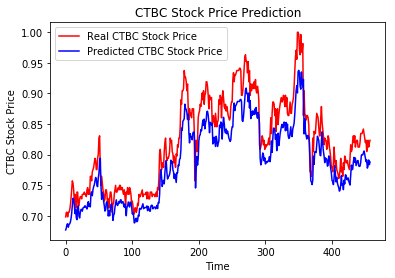

In [77]:
import matplotlib.pyplot as plt
plt.plot(y_test, color = 'red', label = 'Real CTBC Stock Price')
plt.plot(predicted, color = 'blue', label = 'Predicted CTBC Stock Price')
plt.title('CTBC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('CTBC Stock Price')
plt.legend()
plt.show()

In [72]:
y_test = y_test.reshape(-1,1)

In [73]:
real_stock_price = sc.inverse_transform(y_test)

In [75]:
predicted_stock_price = sc.inverse_transform(predicted)

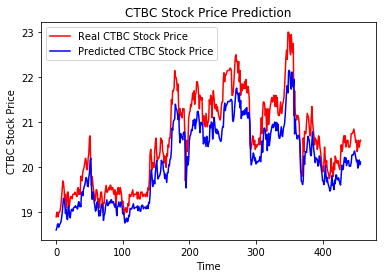

In [78]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price, color = 'red', label = 'Real CTBC Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted CTBC Stock Price')
plt.title('CTBC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('CTBC Stock Price')
plt.legend()
plt.show()

In [79]:
real_stock_price[-1]

array([20.60000038])

In [80]:
predicted_stock_price[-1]

array([20.11528], dtype=float32)

In [81]:
(20.11528 - 20.60000038 )/ 20.60000038

-0.02353011509993003

In [84]:
training_predicted = regressor.predict(X_train)

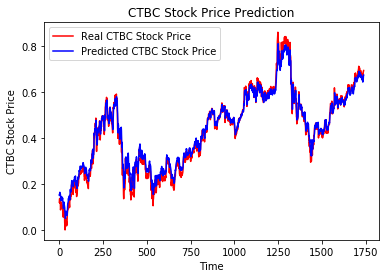

In [85]:
import matplotlib.pyplot as plt
plt.plot(y_train, color = 'red', label = 'Real CTBC Stock Price')
plt.plot(training_predicted, color = 'blue', label = 'Predicted CTBC Stock Price')
plt.title('CTBC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('CTBC Stock Price')
plt.legend()
plt.show()

## 多變數預測

### 讀取資料

In [86]:
from pandas import read_csv
from datetime import datetime

def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')

dataset = read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/pollution.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0


### 資料預處理

In [87]:
dataset.drop('No', axis=1, inplace=True)
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
dataset['pollution'].fillna(0, inplace=True)


In [89]:
dataset = dataset[24:]
dataset.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


### 資料探索

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


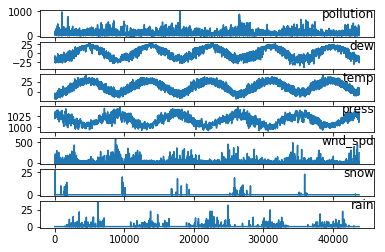

In [90]:
%pylab inline
from matplotlib import pyplot
values = dataset.values

groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

### 資料轉換

In [91]:
import pandas
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pandas.DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pandas.concat(cols, axis=1)
	agg.columns = names
    
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

### 資料編碼

In [92]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')

In [94]:
values[0:3]

array([[ 129.  ,  -16.  ,   -4.  , 1020.  ,    2.  ,    1.79,    0.  ,
           0.  ],
       [ 148.  ,  -15.  ,   -4.  , 1020.  ,    2.  ,    2.68,    0.  ,
           0.  ],
       [ 159.  ,  -11.  ,   -5.  , 1021.  ,    2.  ,    3.57,    0.  ,
           0.  ]], dtype=float32)

### 正規化特徵

In [95]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [96]:
reframed.head(3)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.0,0.0,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.0,0.0,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.0,0.0,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0


### 捨棄欄位

In [97]:
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658


### 分為訓練與測試資料集

In [98]:
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((8760, 1, 8), (8760,), (35039, 1, 8), (35039,))

### 建立模型

In [99]:
import keras
from keras import layers


model = keras.models.Sequential()
model.add(layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(layers.Dense(1))
model.compile(loss='mae', optimizer='adam')

### 訓練模型

In [ ]:
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Train on 8760 samples, validate on 35039 samples
Epoch 1/50
 - 1s - loss: 0.0583 - val_loss: 0.0577
Epoch 2/50
